##### Copyright 2024 Google LLC.

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Guess the shape: Triangle, square, pentagon, ?

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Guess_the_shape.ipynb"><img src="../images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

This notebook provides a quick code example showing how to use multiple images in the same prompt with the Gemini API. You'll show the model a sequence of shapes (a triangle, a square, and a pentagon) and ask it to guess the shape that comes next.

In [ ]:
!pip install -U -q "google-generativeai>=0.7.2"

In [ ]:
import google.generativeai as genai

In [ ]:
from google.colab import userdata
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

In [2]:
model = genai.GenerativeModel('models/gemini-1.5-flash')

In [3]:
!curl -o triangle.png "https://storage.googleapis.com/generativeai-downloads/images/triangle.png" --silent
!curl -o square.png "https://storage.googleapis.com/generativeai-downloads/images/square.png" --silent
!curl -o pentagon.png "https://storage.googleapis.com/generativeai-downloads/images/pentagon.png" --silent

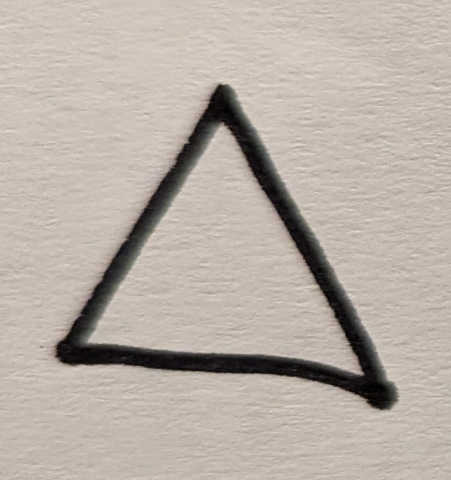

In [4]:
import PIL
from IPython.display import display

triangle = PIL.Image.open('triangle.png')
display(triangle)

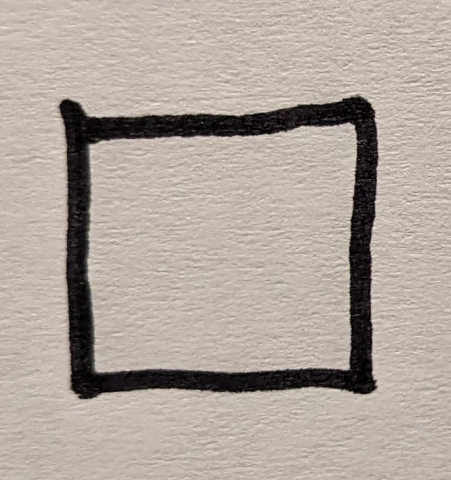

In [5]:
square = PIL.Image.open('square.png')
display(square)

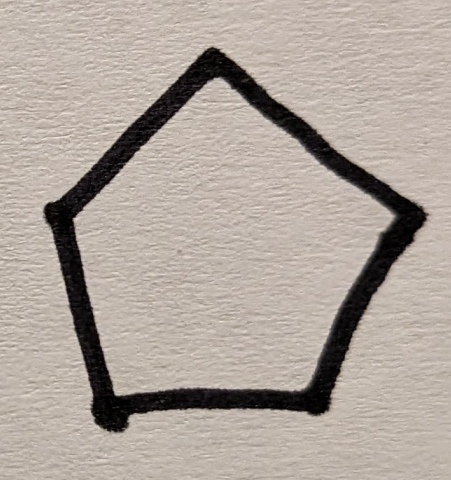

In [6]:
pentagon = PIL.Image.open('pentagon.png')
display(pentagon)

In [7]:
prompt = """Look at this sequence of three shapes. What shape should come as the fourth shape? Explain
your reasoning with detailed descriptions of the first shapes."""

In [8]:
response = model.generate_content([prompt, triangle, square, pentagon])
print(response.text)

The fourth shape should be a hexagon. 

The sequence follows a pattern of increasing the number of sides of the shape by one. The first shape is a triangle (3 sides), the second is a square (4 sides), and the third is a pentagon (5 sides). 



## Further reading

In this notebook, you included images directly in the prompt. This is fine for small images. If your prompts will exceed 20MB in size, you can use the [Files API](https://github.com/google-gemini/cookbook/tree/main/preview/file-api) to upload your images (and other media types) in advance.